In [1]:
import matplotlib.pyplot as plt
import arch.data.core_cpi
from arch.univariate import ARX, ARCH, GARCH, StudentsT

plt.style.use('bmh')

In [2]:
core_cpi = arch.data.core_cpi.load()
core_cpi

,CPILFESL
Date,
1957-01-01,28.500
1957-02-01,28.600
1957-03-01,28.700
1957-04-01,28.800
1957-05-01,28.800
...,...
2018-07-01,257.930
2018-08-01,258.141
2018-09-01,258.441


In [3]:
ann_inflation = 100 * core_cpi.CPILFESL.pct_change(12).dropna()
ann_inflation

Date
1958-01-01    2.807018
1958-02-01    2.797203
1958-03-01    2.787456
1958-04-01    2.430556
1958-05-01    2.430556
                ...   
2018-07-01    2.332870
2018-08-01    2.189541
2018-09-01    2.173612
2018-10-01    2.152010
2018-11-01    2.242002
Name: CPILFESL, Length: 731, dtype: float64

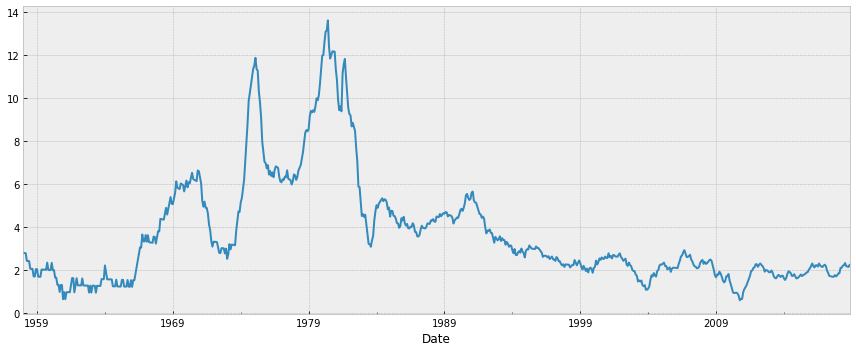

In [4]:
ann_inflation.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

## Mean Models

In [5]:
# All mean models are initialized with constant variance and normal errors.

ar = ARX(100 * ann_inflation, lags=[1, 3, 12])
res = ar.fit()

In [6]:
print(res.summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:               CPILFESL   R-squared:                       0.991
Mean Model:                        AR   Adj. R-squared:                  0.991
Vol Model:          Constant Variance   Log-Likelihood:               -3299.84
Distribution:                  Normal   AIC:                           6609.68
Method:            Maximum Likelihood   BIC:                           6632.57
                                        No. Observations:                  719
Date:                Wed, Mar 23 2022   Df Residuals:                      715
Time:                        09:52:33   Df Model:                            4
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------------------------------
Const            4.0216      2.030      1.981  4.

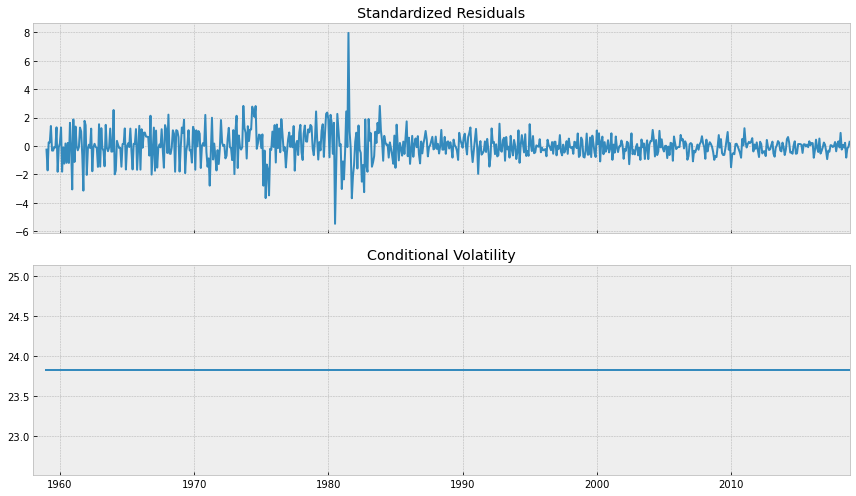

In [7]:
fig = res.plot()
fig.set_size_inches(12,7)
plt.tight_layout()
plt.show()

## Volatility Processes

In [8]:
# adds an ARCH(5) process to model volatility.

ar.volatility = ARCH(p=5)
res = ar.fit()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 916592259.1713024
Iteration:      2,   Func. Count:     31,   Neg. LLF: 1442557.6934052652
Iteration:      3,   Func. Count:     48,   Neg. LLF: 58193.63138009449
Iteration:      4,   Func. Count:     62,   Neg. LLF: 3558.4486365870275
Iteration:      5,   Func. Count:     74,   Neg. LLF: 3346.569293184806
Iteration:      6,   Func. Count:     86,   Neg. LLF: 3468.6828643999597
Iteration:      7,   Func. Count:     99,   Neg. LLF: 3590.5519530942393
Iteration:      8,   Func. Count:    112,   Neg. LLF: 3190.616610488476
Iteration:      9,   Func. Count:    124,   Neg. LLF: 3262.343658548568
Iteration:     10,   Func. Count:    137,   Neg. LLF: 3175.207628282443
Iteration:     11,   Func. Count:    149,   Neg. LLF: 3175.5673576355366
Iteration:     12,   Func. Count:    161,   Neg. LLF: 3174.868831855288
Iteration:     13,   Func. Count:    173,   Neg. LLF: 3174.7235084102795
Iteration:     14,   Func. Count:    184,   Neg. LLF: 3174

In [9]:
print(res.summary())

                           AR - ARCH Model Results                            
Dep. Variable:               CPILFESL   R-squared:                       0.991
Mean Model:                        AR   Adj. R-squared:                  0.991
Vol Model:                       ARCH   Log-Likelihood:               -3174.60
Distribution:                  Normal   AIC:                           6369.19
Method:            Maximum Likelihood   BIC:                           6414.97
                                        No. Observations:                  719
Date:                Wed, Mar 23 2022   Df Residuals:                      715
Time:                        09:52:34   Df Model:                            4
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------------------------------
Const            2.8498      1.883      1.513    

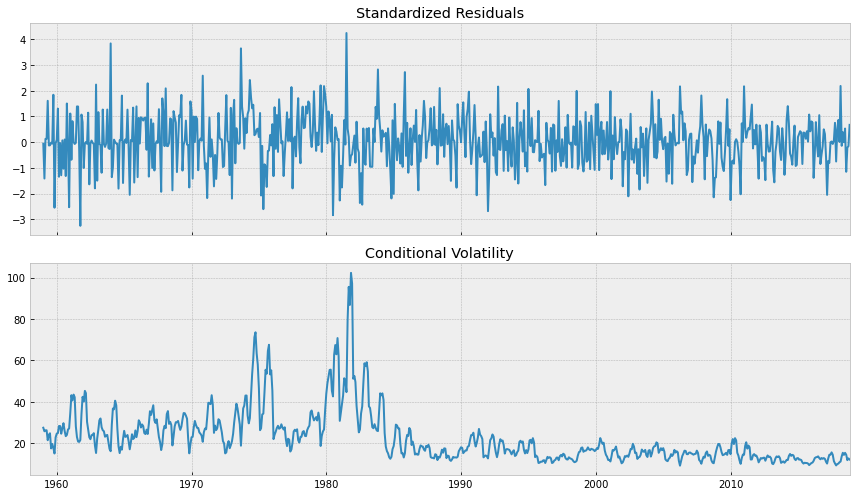

In [10]:
fig = res.plot()
fig.set_size_inches(12,7)
plt.tight_layout()
plt.show()

## Distributions

In [11]:
# change distribution from the default normal to a standardized Student’s T 

ar.distribution = StudentsT()
res = ar.fit()

Iteration:      1,   Func. Count:     13,   Neg. LLF: 26615.293579113735
Iteration:      2,   Func. Count:     35,   Neg. LLF: 8384.377446288536
Iteration:      3,   Func. Count:     52,   Neg. LLF: 7135.567888343116
Iteration:      4,   Func. Count:     67,   Neg. LLF: 3701.638166905859
Iteration:      5,   Func. Count:     79,   Neg. LLF: 7915.030056559345
Iteration:      6,   Func. Count:     95,   Neg. LLF: 4945.7576956540415
Iteration:      7,   Func. Count:    110,   Neg. LLF: 6054.783519533346
Iteration:      8,   Func. Count:    125,   Neg. LLF: 3458.0539837888655
Iteration:      9,   Func. Count:    138,   Neg. LLF: 4554.304876063386
Iteration:     10,   Func. Count:    152,   Neg. LLF: 3359.741377036158
Iteration:     11,   Func. Count:    165,   Neg. LLF: 3569.708981467857
Iteration:     12,   Func. Count:    178,   Neg. LLF: 4465.161377755029
Iteration:     13,   Func. Count:    191,   Neg. LLF: 3251.918852175807
Iteration:     14,   Func. Count:    203,   Neg. LLF: 3404.06

In [12]:
print(res.summary())

                              AR - ARCH Model Results                               
Dep. Variable:                     CPILFESL   R-squared:                       0.991
Mean Model:                              AR   Adj. R-squared:                  0.991
Vol Model:                             ARCH   Log-Likelihood:               -3168.25
Distribution:      Standardized Student's t   AIC:                           6358.51
Method:                  Maximum Likelihood   BIC:                           6408.86
                                              No. Observations:                  719
Date:                      Wed, Mar 23 2022   Df Residuals:                      715
Time:                              09:52:34   Df Model:                            4
                                   Mean Model                                  
                   coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------------------------------------------

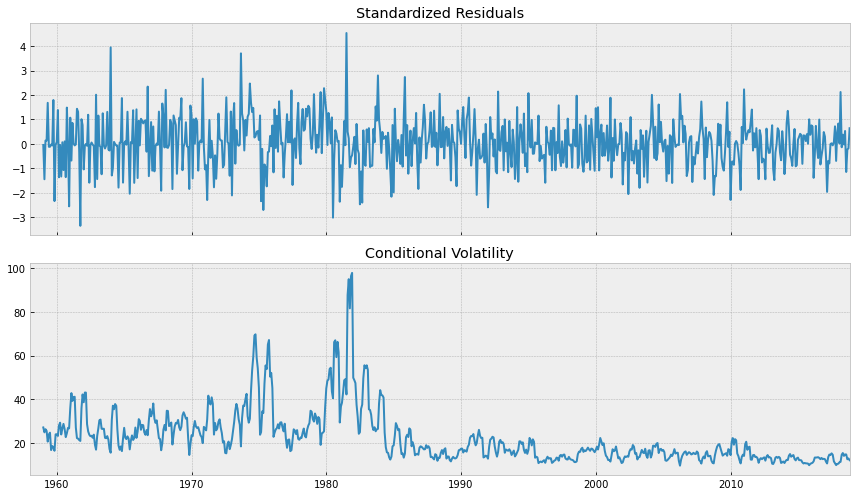

In [13]:
fig = res.plot()
fig.set_size_inches(12,7)
plt.tight_layout()
plt.show()